In [27]:
import pandas as pd

In [28]:
# Data is from here https://waterdata.usgs.gov/nwis/dv?cb_62614=on&format=html&site_no=10010000&referred_module=sw&period=&begin_date=1857-01-29&end_date=2021-01-28
# This header was at the top of data, for reference:
# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2021-01-29 23:59:34 EST       (caww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 10010000 GREAT SALT LAKE AT SALTAIR BOAT HARBOR, UT
# -----------------------------------------------------------------------------------
#
# Data provided for site 10010000
#            TS   parameter     statistic     Description
#        178323       62614     00003     Lake or reservoir water surface elevation above NGVD 1929, feet (Mean)
#
# Data-value qualification codes included in this output:
#        
#     A  Approved for publication -- Processing and review completed.
#     P  Provisional data subject to revision.
#     R  Records for these data have been revised. [https://waterdata.usgs.gov/usa/nwis/revision/?site_no=10010000&ts_ids=178323]
#     e  Value has been estimated.
# 

In [29]:
df = pd.read_table("raw_salt_lake_historical_data.txt", index_col=2, parse_dates=True)
df

,agency_cd,site_no,178323_62614_00003,178323_62614_00003_cd
datetime,,,,
20d,5s,15s,14n,10s
1847-10-18,USGS,10010000,4199.80,A:e
1847-10-19,USGS,10010000,NaN,NaN
1847-10-20,USGS,10010000,NaN,NaN
1847-10-21,USGS,10010000,NaN,NaN
...,...,...,...,...
2021-01-24,USGS,10010000,4192.4,P
2021-01-25,USGS,10010000,4192.4,P
2021-01-26,USGS,10010000,4192.4,P


In [30]:
# Drop unnecessary rows and columns
df = df.iloc[1:]
df = df.drop(columns=['agency_cd', 'site_no', '178323_62614_00003_cd'])
df

,178323_62614_00003
datetime,
1847-10-18,4199.80
1847-10-19,NaN
1847-10-20,NaN
1847-10-21,NaN
1847-10-22,NaN
...,...
2021-01-24,4192.4
2021-01-25,4192.4
2021-01-26,4192.4


In [31]:
# This column measures "Lake or reservoir water surface elevation above NGVD 1929, feet"
df.columns = ['depth']
df

,depth
datetime,
1847-10-18,4199.80
1847-10-19,NaN
1847-10-20,NaN
1847-10-21,NaN
1847-10-22,NaN
...,...
2021-01-24,4192.4
2021-01-25,4192.4
2021-01-26,4192.4


In [40]:
# Index and depth are type object and need to be converted
df.index = pd.to_datetime(df.index)
df.depth = pd.to_numeric(df.depth)

<AxesSubplot:xlabel='datetime'>

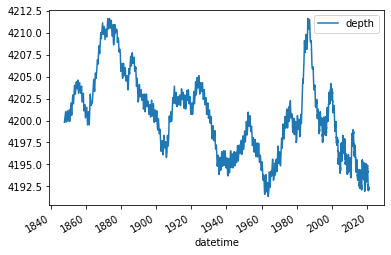

In [45]:
# Plot data
df.dropna().plot()

Questions:
- Seems like it should be possible to get rid of the index title "datetime". Anyone know how to do that?
- What happened in the 80s that made the water rise so much?
- Why does the graph look like that? We have (sparse) data all the way back to 1847, so it seems like it should have drawn lines further back? Answer: I had to put dropna().

In [44]:
df.to_csv("partially_cleaned_salt_lake_historical_data.csv")

In [46]:
# How many data points?
len(df.dropna())

13134

<AxesSubplot:xlabel='datetime'>

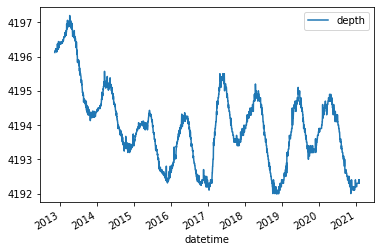

In [49]:
# See recent years more clearly
df[-3000:].dropna().plot()